In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

data = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [ ]:
data

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [ ]:
# Cek missing value
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 label    0
tweet    0
dtype: int64


In [ ]:
# Cek data duplikat
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)


Duplicate rows:
         label                                              tweet
1052     fear  [USERNAME] [USERNAME] Tidak disemua tempat kit...
1358    anger  belajar agama yg tuntas jd nga ngarang dalam h...
1464     fear  Aku gak salah bila mohon pd [USERNAME], segera...
1531  sadness  Turut sepenanggungan atas meninggalnya dr. Ram...
2512     love  Walaupun kita jauh secara fisik, kita tahu kit...
2908    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3319    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3523    happy  All We Know of Heaven, All We Need of Hell - P...
3559    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3735    happy  Bismillah Salam PLUR slankers/i indonesia kita...
3781     fear  Melihat Fotonya Saja Bikin Ngeri, Apalagi Meng...


In [ ]:
# Menghapus data duplikat
df_clean = data.drop_duplicates()

print("DataFrame setelah menghapus data duplikat:")
print(df_clean)

DataFrame setelah menghapus data duplikat:
        label                                              tweet
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...
...       ...                                                ...
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...

[4390 rows x 2 columns]


In [ ]:
id_stopword_dict = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/stopwordbahasa.csv', encoding='latin-1')
id_stopword_dict1 = id_stopword_dict.rename(columns={0: 'stop'})
id_stopword_dict1.head()

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya


In [ ]:
alay_dict = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/new_kamusalay.csv', header=None, encoding='latin-1')
alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
alay_dict.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
# Read the CSV file and specify the separator as ';'
kamus_singkatan_deluxe = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/kamus_singkatan_deluxe.csv', sep=';', encoding='latin-1')
# Set the column names
kamus_singkatan_deluxe.columns = ['Column1', 'Column2']
# Rename the columns correctly
alay_dict2 = kamus_singkatan_deluxe.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
# Create a dictionary for mapping
alay_dict_map2 = dict(zip(alay_dict2['original'], alay_dict2['replacement']))
# Display the head of the renamed DataFrame
alay_dict2.head()

,original,replacement
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
#merubah semua tipe data pada kolom ulasan menjadi string
data['tweet']= data['tweet'].astype(str)
#melakukan case folding berupa mengganti huruf besar menjadi kecil
data['tweet']= data['tweet'].str.lower()

In [ ]:
import string
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus email
    text = re.sub(r'\S+@\S+', '', text)

    # Menghapus tanggal (format yyyy-mm-dd)
    text = re.sub(r'\d{4}-\d{2}-\d{2}', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+', '', text)

    # Menghapus HTML tag
    text = re.sub(r'<.*?>', '', text)

    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Menghapus tanda baca (punctuation)
    text = re.sub(r'\d', ' ', text)  # Mengganti angka dengan spasi

    # Menghapus emoji (emoticon)
    text = remove_emoji(text)

    # Menghapus karakter-karakter non-alphanumerik seperti *[ { [*
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Mengganti beberapa spasi ganda dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    #menghapus singgle chart
    text = re.sub(r'\b\w\b', '', text)

    return text

# Fungsi untuk menghapus emoji dari teks
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Contoh penggunaan pada kolom 'ulasan' pada dataframe
data['tweet'] = data['tweet'].apply(clean_text)

In [ ]:
data

,label,tweet
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...
4,happy,sharing pengalaman aja kemarin jam batalin tik...
...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...


In [ ]:
from nltk.tokenize import word_tokenize

# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['data_tokenize']=data['tweet'].apply(word_tokenize_wrapper)
data

,label,tweet,data_tokenize
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g..."
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang..."
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal..."
...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja..."
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow..."
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman..."
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn..."


In [ ]:
def normalize_alay(tokens):
    return [alay_dict_map[token] if token in alay_dict_map else token for token in tokens]

def normalize_alay2(tokens):
    return [alay_dict_map2[token] if token in alay_dict_map2 else token for token in tokens]

def norm(tokens):
    tokens = normalize_alay(tokens)  # Normalize tokens using alay_dict_map
    tokens = normalize_alay2(tokens)  # Normalize tokens using alay_dict_map2
    return tokens

data['data_normalisasi'] = data['data_tokenize'].apply(norm)


In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger..."
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa..."
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar..."
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba..."
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata..."
...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja..."
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny..."
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga..."
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,..."


In [ ]:
def remove_stopword(tokens):
    filtered_tokens = [token for token in tokens if token not in id_stopword_dict.ada.values]
    text = ' '.join(filtered_tokens)
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text

data['data_stopword'] = data['data_normalisasi'].apply(remove_stopword)

In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi,data_stopword
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger...",jalan jatibarupolisi gertak gubernur emangny p...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa...",cewek kayaknya rasakan sibuk jaga rasakan saki...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar...",gudeg mbarek bu hj foto google sengaja biar te...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba...",jalan jatibarubagian wilayah tn abangpengatura...
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata...",sharing pengalaman kemarin jam batalin tiket s...
...,...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja...",tahukah papa memejamkan matanya menahan gejola...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny...",sulitnya menetapkan calon wakil presidennya jo...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga...",depannya tidak iya coba lulusan seni bisanya m...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,...",nama pengguna benaran ada mahasiswa teknik oi ...


In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return stemmer.stem(text)
data['data_stemming'] = data['data_stopword'].apply(stem_text)

In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi,data_stopword,data_stemming
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger...",jalan jatibarupolisi gertak gubernur emangny p...,jalan jatibarupolisi gertak gubernur emangny p...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa...",cewek kayaknya rasakan sibuk jaga rasakan saki...,cewek kayak rasa sibuk jaga rasa sakit haid pa...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar...",gudeg mbarek bu hj foto google sengaja biar te...,gudeg mbarek bu hj foto google sengaja biar te...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba...",jalan jatibarubagian wilayah tn abangpengatura...,jalan jatibarubagian wilayah tn abangpengatura...
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata...",sharing pengalaman kemarin jam batalin tiket s...,sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja...",tahukah papa memejamkan matanya menahan gejola...,tahu papa mejam mata tahan gejolak batin papa ...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny...",sulitnya menetapkan calon wakil presidennya jo...,sulit tetap calon wakil presiden jokowi pilih ...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga...",depannya tidak iya coba lulusan seni bisanya m...,depan tidak iya coba lulus seni bisa tari kerj...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,...",nama pengguna benaran ada mahasiswa teknik oi ...,nama guna benar ada mahasiswa teknik oi tembak...


In [ ]:
# Drop semua kolom kecuali 'data_stemming'
data_clean = data[['data_stemming','label']].copy()

# Ubah nama kolom menjadi 'data_clean'
data_clean.columns = ['data_clean','label']

In [ ]:
data_clean

,data_clean,label
0,jalan jatibarupolisi gertak gubernur emangny p...,anger
1,cewek kayak rasa sibuk jaga rasa sakit haid pa...,anger
2,gudeg mbarek bu hj foto google sengaja biar te...,happy
3,jalan jatibarubagian wilayah tn abangpengatura...,anger
4,sharing alam kemarin jam batalin tiket stasiun...,happy
...,...,...
4396,tahu papa mejam mata tahan gejolak batin papa ...,love
4397,sulit tetap calon wakil presiden jokowi pilih ...,fear
4398,depan tidak iya coba lulus seni bisa tari kerj...,anger
4399,nama guna benar ada mahasiswa teknik oi tembak...,happy


In [ ]:
import pandas as pd

data_clean = pd.read_csv('data_twitter_emosi_bersih.csv')

In [ ]:
data_clean = data_clean.drop(columns=['Unnamed: 0'])

In [ ]:
data_clean

,data_clean,label
0,jalan jatibarupolisi gertak gubernur emangny p...,Negatif
1,cewek kayak rasa sibuk jaga rasa sakit haid pa...,Negatif
2,gudeg mbarek bu hj foto google sengaja biar te...,Positif
3,jalan jatibarubagian wilayah tn abangpengatura...,Negatif
4,sharing alam kemarin jam batalin tiket stasiun...,Positif
...,...,...
4396,tahu papa mejam mata tahan gejolak batin papa ...,Positif
4397,sulit tetap calon wakil presiden jokowi pilih ...,Negatif
4398,depan tidak iya coba lulus seni bisa tari kerj...,Negatif
4399,nama guna benar ada mahasiswa teknik oi tembak...,Positif


In [ ]:
# mapping = {
#     'anger': 'Negatif',
#     'sadness': 'Negatif',
#     'fear': 'Negatif',
#     'happy': 'Positif',
#     'love': 'Positif'
# }

# # Mengelompokkan label sesuai dengan mapping
# data_clean['kelas_baru'] = data_clean['label'].map(mapping)

# # Melihat hasil pengelompokan
# print(data_clean)

                                             data_clean    label kelas_baru
0     jalan jatibarupolisi gertak gubernur emangny p...    anger    Negatif
1     cewek kayak rasa sibuk jaga rasa sakit haid pa...    anger    Negatif
2     gudeg mbarek bu hj foto google sengaja biar te...    happy    Positif
3     jalan jatibarubagian wilayah tn abangpengatura...    anger    Negatif
4     sharing alam kemarin jam batalin tiket stasiun...    happy    Positif
...                                                 ...      ...        ...
4396  tahu papa mejam mata tahan gejolak batin papa ...     love    Positif
4397  sulit tetap calon wakil presiden jokowi pilih ...     fear    Negatif
4398  depan tidak iya coba lulus seni bisa tari kerj...    anger    Negatif
4399  nama guna benar ada mahasiswa teknik oi tembak...    happy    Positif
4400         ya allah engkau sakit hati sembuh ya allah  sadness    Negatif

[4401 rows x 3 columns]


In [ ]:
# data_clean = data_clean.drop(columns=['label'])

In [ ]:
# data_clean.rename(columns={'kelas_baru': 'label'}, inplace=True)

In [ ]:
# data_clean

,data_clean,label
0,jalan jatibarupolisi gertak gubernur emangny p...,Negatif
1,cewek kayak rasa sibuk jaga rasa sakit haid pa...,Negatif
2,gudeg mbarek bu hj foto google sengaja biar te...,Positif
3,jalan jatibarubagian wilayah tn abangpengatura...,Negatif
4,sharing alam kemarin jam batalin tiket stasiun...,Positif
...,...,...
4396,tahu papa mejam mata tahan gejolak batin papa ...,Positif
4397,sulit tetap calon wakil presiden jokowi pilih ...,Negatif
4398,depan tidak iya coba lulus seni bisa tari kerj...,Negatif
4399,nama guna benar ada mahasiswa teknik oi tembak...,Positif


In [ ]:
data_clean.to_csv('data_twitter_emosi_bersih.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data_clean['data_clean'])

# Step 2: Transform count vectors to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
from sklearn.decomposition import PCA

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X_tfidf.toarray())

print("Dimensi dari fitur setelah PCA:", X_pca.shape)

Dimensi dari fitur setelah PCA: (4401, 80)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_pca, data_clean['label'], test_size=0.1, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.93      0.84       275
     Positif       0.82      0.55      0.66       166

    accuracy                           0.78       441
   macro avg       0.80      0.74      0.75       441
weighted avg       0.79      0.78      0.77       441

Confusion Matrix:
[[255  20]
 [ 75  91]]


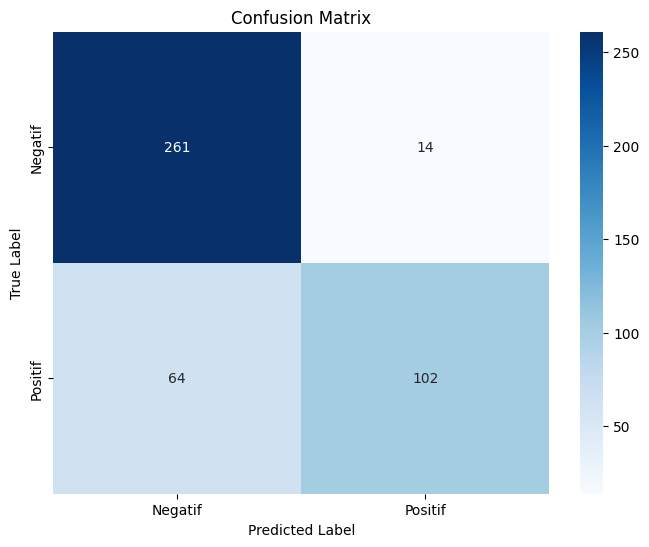

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])

# Step 3: Add labels, title, and axis names
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Step 4: Show the plot
plt.show()


In [ ]:
import joblib
joblib.dump(rf_model, 'pca_rf_model_2kelas.pkl')

['pca_rf_model_2kelas.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.78      0.97      0.86       275
     Positif       0.92      0.54      0.68       166

    accuracy                           0.81       441
   macro avg       0.85      0.75      0.77       441
weighted avg       0.83      0.81      0.79       441

Confusion Matrix:
[[267   8]
 [ 77  89]]


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Different solvers
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Step 2: Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Step 3: Initialize Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Step 4: Fit the model with Grid Search
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best model
best_logreg = grid_search.best_estimator_

# Step 6: Make predictions on the test set
y_pred = best_logreg.predict(X_test)

# Step 7: Evaluate the optimized model
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.80      0.95      0.87       275
     Positif       0.89      0.61      0.72       166

    accuracy                           0.82       441
   macro avg       0.84      0.78      0.80       441
weighted avg       0.83      0.82      0.81       441

Confusion Matrix:
[[262  13]
 [ 65 101]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Function to train, predict, and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Decode labels back to original text labels for evaluation
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    print(f"=== {model_name} ===")
    print("Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))
    print("\n")

# Training and evaluation for each algorithm

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train, y_train_encoded, X_test, y_test_encoded, "Random Forest")

# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
train_and_evaluate_model(svm_model, X_train, y_train_encoded, X_test, y_test_encoded, "Support Vector Machine")

# 3. XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
train_and_evaluate_model(xgb_model, X_train, y_train_encoded, X_test, y_test_encoded, "XGBoost")

# 4. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(ada_model, X_train, y_train_encoded, X_test, y_test_encoded, "AdaBoost")

# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, y_train_encoded, X_test, y_test_encoded, "K-Nearest Neighbors")

# 6. Naive Bayes
nb_model = MultinomialNB()
train_and_evaluate_model(nb_model, X_train, y_train_encoded, X_test, y_test_encoded, "Naive Bayes")

# 7. Logistic Regression
logreg_model = LogisticRegression(max_iter=200, random_state=42)
train_and_evaluate_model(logreg_model, X_train, y_train_encoded, X_test, y_test_encoded, "Logistic Regression")


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

       anger       0.62      0.72      0.67       119
        fear       0.90      0.69      0.78        62
       happy       0.78      0.55      0.65       111
        love       0.79      0.89      0.84        55
     sadness       0.46      0.55      0.50        94

    accuracy                           0.66       441
   macro avg       0.71      0.68      0.69       441
weighted avg       0.69      0.66      0.66       441

Confusion Matrix:
[[86  1  5  2 25]
 [ 9 43  2  1  7]
 [17  2 61  4 27]
 [ 1  0  2 49  3]
 [26  2  8  6 52]]


=== Support Vector Machine ===
Classification Report:
              precision    recall  f1-score   support

       anger       0.64      0.75      0.69       119
        fear       0.92      0.55      0.69        62
       happy       0.71      0.59      0.64       111
        love       0.83      0.82      0.83        55
     sadness       0.47      0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.70      0.64       119
        fear       0.88      0.69      0.77        62
       happy       0.72      0.56      0.63       111
        love       0.76      0.82      0.79        55
     sadness       0.43      0.49      0.46        94

    accuracy                           0.63       441
   macro avg       0.68      0.65      0.66       441
weighted avg       0.65      0.63      0.64       441

Confusion Matrix:
[[83  2  9  1 24]
 [ 8 43  2  1  8]
 [17  2 62  5 25]
 [ 2  0  3 45  5]
 [29  2 10  7 46]]


=== AdaBoost ===
Classification Report:
              precision    recall  f1-score   support

       anger       0.41      0.80      0.54       119
        fear       0.81      0.63      0.71        62
       happy       0.67      0.34      0.45       111
        love       0.70      0.80      0.75        55
     sadness       0.33      0.15      0.21       

In [ ]:
from time import time
import joblib

start = time()
loaded_model = joblib.load("RF_model.sav")
Y_pred = loaded_model.predict(X_PCA)
# acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

print(Y_pred)
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['anger' 'anger' 'anger' ... 'happy' 'happy' 'happy']
Lama waktu yang dibutuhkan untuk memproses yaitu 0.24 detik.


In [ ]:
data_clean['label'] = Y_pred
data_clean.head()

TypeError: 'str' object does not support item assignment

<ipython-input-94-ba7b33c315e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=number, palette="vlag")


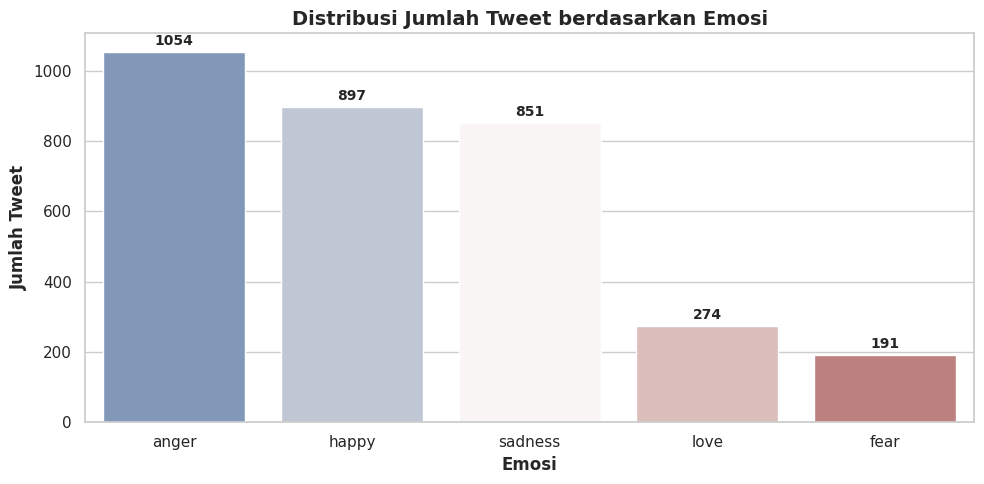

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'label' is the column of interest
number = data_clean['label'].value_counts()
labels = number.index

# Create a more attractive barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=labels, y=number, palette="vlag")

# Customize the axes and labels
ax.set_xlabel("Emosi", fontsize=12, weight='bold')
ax.set_ylabel("Jumlah Tweet", fontsize=12, weight='bold')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, weight='bold')

# Set the title of the plot
plt.title('Distribusi Jumlah Tweet berdasarkan Emosi', fontsize=14, weight='bold')

# Improve the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
def map_sentiment(label):
    positive_labels = ['love', 'happy']
    negative_labels = ['anger', 'sadness', 'fear']

    if label in positive_labels:
        return 'positif'
    elif label in negative_labels:
        return 'negatif'
    else:
        return 'netral'  # atau kategori lain yang Anda inginkan

# Terapkan fungsi map_sentiment ke kolom label
data_clean['sentimen'] = data_clean['label'].apply(map_sentiment)
data_clean.head()

,data_clean,label,sentimen
0,boikot merch album muka sih niat stop dana hyb...,anger,negatif
1,polisi republik indonesia koordinasi ppatk ojk...,anger,negatif
2,korupsi sektor bangun mergo alir dana teko pot...,anger,negatif
3,komisi berantas korupsi hancur firli bebas len...,anger,negatif
4,situs ilegal langsung diblokirknp judol bilang...,anger,negatif


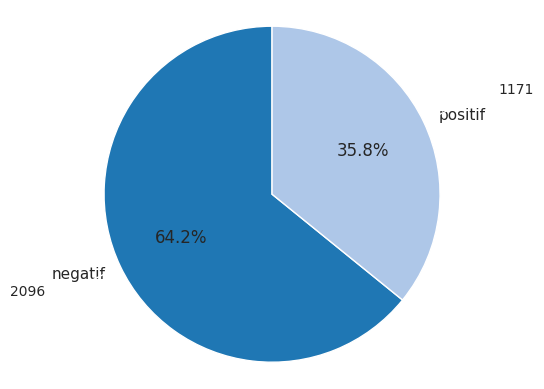

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'datakorupsibaru' is a DataFrame with a 'sentimen' column
labels = list(data_clean['sentimen'].value_counts().index)
sizes = list(data_clean['sentimen'].value_counts().values)

fig1, ax1 = plt.subplots()
# Define a color palette with two blue shades
colors = ['#1f77b4', '#aec7e8']  # Feel free to choose your own shades of blue
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')

# Add text annotations
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax1.annotate(sizes[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, fontsize=10,
                 arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))
plt.show()


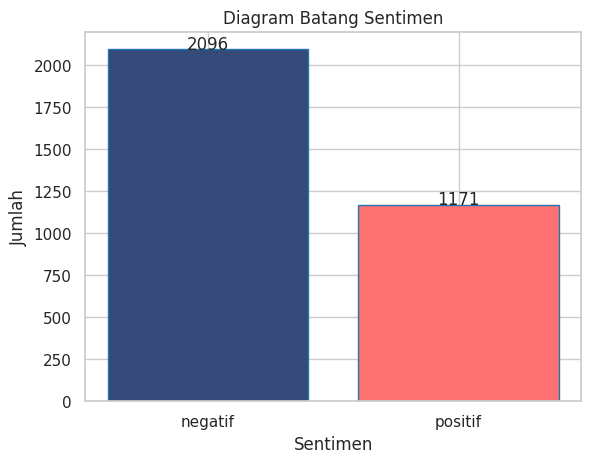

In [ ]:
import matplotlib.pyplot as plt

# Your existing code for sentiment counts
sentimen_counts = data_clean['sentimen'].value_counts()

labels = sentimen_counts.index
values = sentimen_counts.values

# Define two blue colors as a list
colors = ['#354a78', '#ff7272']  # Darker blue, Lighter blue

# Use the colors in the bar chart and set the edge color to a darker blue for contrast
plt.bar(labels, values, color=colors, edgecolor='#1f77b4')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Sentimen')

# Add text labels above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center')

# Display the plot
plt.show()

MAPPING GOLONGAN / BIDANG KORUPSI

In [ ]:
Kategori_korupsi = pd.read_csv('https://raw.githubusercontent.com/rizkyyanuark/testpython/main/Gemastik/kategori_korupsi.csv')
gol_korupsi = []

for index, row in data_clean.iterrows():
    data_clean = row['data_clean']
    sentiment = row['sentimen']

    if pd.isna(data_clean) or sentiment == 'positif':
        gol_korupsi.append('Tidak Terdeteksi')
        continue
    if any(str(word) in data_clean for word in list(Kategori_korupsi['Kesehatan'])):
        gol_korupsi.append('Kesehatan')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Teknologi'])):
        gol_korupsi.append('Teknologi')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Polisi'])):
        gol_korupsi.append('Polisi')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Ekonomi'])):
        gol_korupsi.append('Ekonomi')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Infrastruktur'])):
        gol_korupsi.append('Infrastruktur')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Pendidikan'])):
        gol_korupsi.append('Pendidikan')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Hukum'])):
        gol_korupsi.append('Hukum')
    elif any(str(word) in data_clean for word in list(Kategori_korupsi['Sosial'])):
        gol_korupsi.append('Sosial')
    else:
        gol_korupsi.append('Tidak Terdefinisi')
data_clean['gol_korupsi'] = gol_korupsi
data_clean = data_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data_clean = data_clean.dropna()
data_clean

TypeError: 'str' object does not support item assignment

In [ ]:
import pandas as pd

# Baca file kategori korupsi dari URL
kategori_korupsi_url = 'https://raw.githubusercontent.com/rizkyyanuark/testpython/main/Gemastik/kategori_korupsi.csv'
kategori_korupsi = pd.read_csv(kategori_korupsi_url)

# Buat list untuk menyimpan kategori korupsi
gol_korupsi = []

# Pastikan variabel data_clean berisi DataFrame, bukan string
for index, row in data_clean.iterrows():
    data_clean_text = row['data_clean']
    sentiment = row['sentimen']

    if pd.isna(data_clean_text) or sentiment == 'positif':
        gol_korupsi.append('Tidak Terdeteksi')
        continue

    # Cek apakah kata kunci kategori korupsi terdapat dalam data_clean_text
    for col_name in kategori_korupsi.columns:
        if any(str(word) in data_clean_text for word in list(kategori_korupsi[col_name])):
            gol_korupsi.append(col_name)
            break
    else:
        gol_korupsi.append('Tidak Terdefinisi')

# Tambahkan kolom 'gol_korupsi' ke DataFrame data_clean
data_clean['gol_korupsi'] = gol_korupsi

# Hapus spasi berlebih di setiap sel DataFrame
data_clean = data_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Hapus baris yang memiliki nilai NaN
data_clean = data_clean.dropna()

# Tampilkan DataFrame hasil akhir
data_clean


AttributeError: 'str' object has no attribute 'iterrows'